# Link prediction on truck co-driving network
This notebook shows how the codriving_network module should be used.

In [5]:
%load_ext autoreload
%autoreload 2

import datetime, os, pathlib, pickle

import numpy as np
import pandas as pd

if 'project_dir' not in globals():
  project_dir = pathlib.Path.cwd().parent
os.chdir(project_dir)

In [6]:
with open('models/1/performance.pkl', 'rb') as file:
    df = pickle.load(file)

In [7]:
df['auroc']

0.5793941884566829

In [8]:
df['ap']

0.013664399876250802

## Feature importance
This is the Gini feature importance for every feature.

In [11]:
feature_importance = df['clf'].feature_importances_
pd.Series(feature_importance, index=pd.read_pickle('models/1/xtest.pkl').columns).sort_index()

country_same               0.010878
degree_diff                0.007051
degree_sum                 0.016204
f_30_A12 L Woerden         0.010770
f_30_A15 R Giessenburg     0.036305
f_30_A16 R Dordrecht       0.038770
f_365_A12 L Woerden        0.021652
f_365_A12 R Woerden        0.024378
f_365_A15 L Giessenburg    0.087530
f_365_A15 R Giessenburg    0.098766
f_365_A16 L Dordrecht      0.100503
f_365_A16 R Dordrecht      0.123594
f_7_A12 L Woerden          0.005628
f_7_A15 R Giessenburg      0.014473
f_7_A16 R Dordrecht        0.003421
nb_common                  0.015866
nb_total                   0.014153
night_diff                 0.037178
night_sum                  0.020274
shortest_path              0.080346
truck_ax_diff              0.008010
truck_ax_sum               0.007243
truck_len_diff             0.048406
truck_len_sum              0.021803
truck_mass_diff            0.033077
truck_mass_sum             0.020800
volume_diff                0.013065
volume_sum                 0

## ROC plot

In [ ]:
%%time
pred = results['clf'].predict_proba(split.xtest)
fpr, tpr, _ = roc_curve(split.ytest, pred[:, 1], drop_intermediate=True)
n, p = np.bincount(split.ytest)

plt.figure()
plt.fill_between(fpr*n, tpr*p)
plt.plot([0,n], [0,p], ls="--", c="C1")
plt.xlabel('False Positives (millions)')
plt.ylabel('True Positives')
plt.xlim(0, n)
plt.ylim(0, p)

In [1]:
# Function that convert feature name to feature type.
def getType(label): 
  if label.startswith("deg"): return "NB"
  if label.startswith("vol"): return "NB"
  if label.startswith("nb") : return "NB"
  if label == "shortestPath": return "P"
  if label.startswith("f")  : return "ST"
  return "Node"

feature_importance = pd.DataFrame(
  {"i": results['clf'].feature_importances_, 
   "t": [getType(c) for c in split.xtest.columns]}, 
  index=split.xtest.columns)
feature_importance

NameError: name 'pd' is not defined

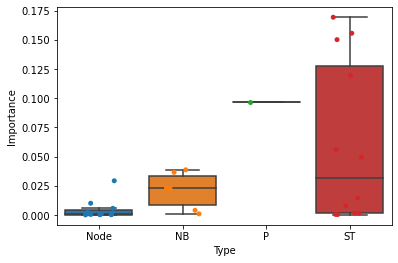

In [7]:
sns.boxplot(data=feature_importance, x="t", y="i", fliersize=0)
sns.stripplot(data=feature_importance, x="t", y="i", jitter=.2, s=5)
plt.xlabel("Type")
plt.ylabel("Importance")
plt.tick_params(which="both")

The difference between this figure and Figure 7 of CN2019 can possibly be explained because of an error in the code used for the paper ($u$ and $v$ swap at some point).